## Step 1: Preparations

### Importing libraries

In [44]:
import math
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib.lines import Line2D
from matplotlib.patches import Wedge
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [45]:
#import dataset for men
dfm = pd.read_excel("./NCDRISK2019_data.xlsx", index_col=None, sheet_name="men")
dfm = dfm.sort_values("Year").reset_index(drop=True)
# df2.to_csv("NCDRISK2019_data.csv", index=False)
dfm.head()

#import dataset for women
dfw = pd.read_excel("./NCDRISK2019_data.xlsx", index_col=None, sheet_name="women")
dfw = dfw.sort_values("Year").reset_index(drop=True)
dfw.head()

#merging dataframes
# Assuming dfm and dfw have indexes set to 'country' and 'ISO'
merged_df = pd.merge(dfm, dfw, on=['Country', 'ISO'], how='inner')
merged_df.head(200)

,Country,ISO,Sex_x,Year_x,Age_x,htn_x,diag(%),treat_x,control_x,untreated_stage2HTN,Sex_y,Year_y,Age_y,htn_y,diag,treat_y,control_y,Proportion of untreated stage 2 hypertension among all hypertension
0,Zimbabwe,ZWE,Men,2019,Age standardised (30-79 years),0.368610,0.381765,0.274812,0.123844,0.260777,Women,2019,Age standardised (30-79 years),0.464479,0.535012,0.405860,0.189487,0.221870
1,Angola,AGO,Men,2019,Age standardised (30-79 years),0.364898,0.390702,0.222399,0.092537,0.320969,Women,2019,Age standardised (30-79 years),0.408318,0.552092,0.268786,0.134141,0.326803
2,Antigua and Barbuda,ATG,Men,2019,Age standardised (30-79 years),0.419434,0.532954,0.397058,0.181354,0.196380,Women,2019,Age standardised (30-79 years),0.431860,0.717560,0.577088,0.274014,0.142032
3,Argentina,ARG,Men,2019,Age standardised (30-79 years),0.540144,0.524556,0.352782,0.109899,0.208704,Women,2019,Age standardised (30-79 years),0.412314,0.650665,0.481173,0.194389,0.156120
4,Armenia,ARM,Men,2019,Age standardised (30-79 years),0.484636,0.355704,0.224672,0.072774,0.256997,Women,2019,Age standardised (30-79 years),0.462255,0.444517,0.328835,0.100523,0.231014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Sudan,SDN,Men,2019,Age standardised (30-79 years),0.380456,0.248009,0.162560,0.064033,0.271727,Women,2019,Age standardised (30-79 years),0.434560,0.397866,0.282338,0.096757,0.254538
196,Sri Lanka,LKA,Men,2019,Age standardised (30-79 years),0.344245,0.387167,0.286467,0.129638,0.217444,Women,2019,Age standardised (30-79 years),0.364732,0.530838,0.416148,0.175782,0.200428
197,Spain,ESP,Men,2019,Age standardised (30-79 years),0.335216,0.614126,0.510156,0.295112,0.082044,Women,2019,Age standardised (30-79 years),0.208047,0.715550,0.579509,0.345198,0.076938
198,Tunisia,TUN,Men,2019,Age standardised (30-79 years),0.344677,0.364304,0.295916,0.102925,0.191229,Women,2019,Age standardised (30-79 years),0.348321,0.535194,0.431942,0.185293,0.145486


In [46]:
#adding male and female together
merged_df['htn'] = merged_df[['htn_x', 'htn_y']].mean(axis=1)
merged_df['treat'] = merged_df[['treat_x', 'treat_y']].mean(axis=1)
merged_df['control'] = merged_df[['control_x', 'control_y']].mean(axis=1)
merged_df['diagn'] = merged_df[['diag(%)', 'diag']].mean(axis=1)
merged_df['untreatedstage2HTN'] = merged_df[['untreated_stage2HTN', 'Proportion of untreated stage 2 hypertension among all hypertension']].mean(axis=1)
merged_df.columns

Index(['Country', 'ISO', 'Sex_x', 'Year_x', 'Age_x', 'htn_x', 'diag(%)',
       'treat_x', 'control_x', 'untreated_stage2HTN', 'Sex_y', 'Year_y',
       'Age_y', 'htn_y', 'diag', 'treat_y', 'control_y',
       'Proportion of untreated stage 2 hypertension among all hypertension',
       'htn', 'treat', 'control', 'diagn', 'untreatedstage2HTN'],
      dtype='object')

In [47]:
df = merged_df.rename(columns={"ISO":"Country_code"})
df.columns
df.to_excel("NCDRISK2019_data2.xlsx", index=False)


In [48]:
#load the dataset with country classification information
df = pd.read_excel("./NCDRISK2019_data2.xlsx", usecols=['Country', 'Country_code','Sex_x', 'Year_x', 'diagn','htn', 'treat', 'control', 'untreatedstage2HTN'])
df.columns

Index(['Country', 'Country_code', 'Sex_x', 'Year_x', 'htn', 'treat', 'control',
       'diagn', 'untreatedstage2HTN'],
      dtype='object')

In [49]:
df1 = pd.read_excel("./country_class.xlsx")
df1.columns

df2 = pd.read_csv("./physicians-per-1000-people.csv")
df2.columns

# Sort DataFrame by 'country'
df2_sorted = df2.sort_values(by=['Country', 'Year'])

# Group by 'country' and get the last row for each group
df_last = df2_sorted.groupby('Country').tail(1) 

df_last.head(100)
df_last.shape

(222, 4)

In [50]:
# merged_df = pd.merge(df, df1, df2, on=['Country'], how='inner')
# merged_df.columns
# merged_df.head(100)
# #doing some data checks using print function 
# # print(merged_df[merged_df["Country"]=="Somalia"])

In [51]:
import pandas as pd
from functools import reduce

# List of dataframes to be merged
dfs = [df, df1, df_last]

# Merge all dataframes in the list
merged_df = reduce(lambda left, right: pd.merge(left, right, on='Country', how='inner'), dfs)
merged_df.columns
merged_df.head(100)

,Country,Country_code,Sex_x,Year_x,htn,treat,control,diagn,untreatedstage2HTN,Income,pop,Code_x,Code_y,Year,phy
0,Zimbabwe,ZWE,Men,2019,0.416545,0.340336,0.156665,0.458389,0.241324,Lower middle income,9000000,ZWE,ZWE,2020,0.189
1,Angola,AGO,Men,2019,0.386608,0.245593,0.113339,0.471397,0.323886,Lower middle income,17000000,AGO,AGO,2018,0.211
2,Antigua and Barbuda,ATG,Men,2019,0.425647,0.487073,0.227684,0.625257,0.169206,High income,68000,ATG,ATG,2017,2.898
3,Argentina,ARG,Men,2019,0.476229,0.416977,0.152144,0.587610,0.182412,Upper middle income,35000000,ARG,ARG,2020,3.895
4,Armenia,ARM,Men,2019,0.473445,0.276754,0.086649,0.400111,0.244006,Upper middle income,2100000,ARM,ARM,2017,4.546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Libya,LBY,Men,2019,0.426837,0.355824,0.113456,0.480741,0.189585,Upper middle income,5800000,LBY,LBY,2017,2.157
96,Lithuania,LTU,Men,2019,0.480124,0.451007,0.128982,0.694107,0.177486,High income,2000000,LTU,LTU,2021,4.950
97,Luxembourg,LUX,Men,2019,0.303871,0.512142,0.302763,0.592020,0.102859,High income,490000,LUX,LUX,2017,2.985
98,Madagascar,MDG,Men,2019,0.368338,0.156161,0.063790,0.335131,0.282551,Low income,12000000,MDG,MDG,2018,0.195


In [52]:
df = merged_df.sort_values(by=["Income","htn"]).reset_index(drop=True)
df.head(100)
# import pycountry
# print(pycountry.countries.get(name='Canada').alpha_2)

,Country,Country_code,Sex_x,Year_x,htn,treat,control,diagn,untreatedstage2HTN,Income,pop,Code_x,Code_y,Year,phy
0,Switzerland,CHE,Men,2019,0.219583,0.563196,0.373058,0.732360,0.087655,High income,6700000,CHE,CHE,2021,4.443
1,Canada,CAN,Men,2019,0.221349,0.731616,0.604678,0.775773,0.104165,High income,31800000,CAN,CAN,2021,2.464
2,United Kingdom,GBR,Men,2019,0.264619,0.476117,0.299334,0.589556,0.110644,High income,51000000,GBR,GBR,2021,3.171
3,South Korea,KOR,Men,2019,0.265859,0.723152,0.535361,0.723435,0.054377,High income,42000000,KOR,KOR,2020,2.508
4,Spain,ESP,Men,2019,0.271631,0.544833,0.320155,0.664838,0.079491,High income,36000000,ESP,ESP,2020,4.577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Tunisia,TUN,Men,2019,0.346499,0.363929,0.144109,0.449749,0.168357,Lower middle income,7800000,TUN,TUN,2017,1.261
96,Morocco,MAR,Men,2019,0.353005,0.285005,0.099287,0.426362,0.205782,Lower middle income,27000000,MAR,MAR,2017,0.732
97,Nicaragua,NIC,Men,2019,0.356828,0.594675,0.337923,0.660216,0.123314,Lower middle income,3900000,NIC,NIC,2018,0.664
98,Togo,TGO,Men,2019,0.358669,0.198667,0.091176,0.411302,0.276648,Lower middle income,5000000,TGO,TGO,2021,0.059


In [53]:
#writing a function that multiples datacolumn in fraction by 100
def multiplyby100(df):
    columns_to_multiply = ['diagn', 'htn', 'treat', 'control', 'untreatedstage2HTN']
    
    # Ensure all specified columns exist in the DataFrame
    for col in columns_to_multiply:
        if col in df.columns:
            df[col] = df[col] * 100
    
    return df
# Apply the function
df = multiplyby100(df)
print(df)


                Country Country_code Sex_x  Year_x        htn      treat  \
0           Switzerland          CHE   Men    2019  21.958334  56.319602   
1                Canada          CAN   Men    2019  22.134901  73.161603   
2        United Kingdom          GBR   Men    2019  26.461932  47.611723   
3           South Korea          KOR   Men    2019  26.585852  72.315199   
4                 Spain          ESP   Men    2019  27.163117  54.483266   
..                  ...          ...   ...     ...        ...        ...   
176             Romania          ROU   Men    2019  48.267799  59.474355   
177  Dominican Republic          DOM   Men    2019  49.078111  53.282552   
178             Belarus          BLR   Men    2019  49.096652  47.086140   
179              Tuvalu          TUV   Men    2019  50.019701  19.868217   
180            Paraguay          PRY   Men    2019  56.250543  38.621644   

       control      diagn  untreatedstage2HTN               Income       pop  \
0    37

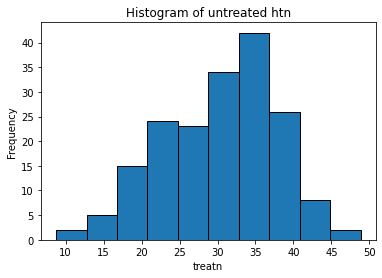

,Country,Country_code,Sex_x,Year_x,htn,treat,control,diagn,untreatedstage2HTN,Income,pop,Code_x,Code_y,Year,phy,treatn,controln,diagng,htn2
0,Canada,CAN,Men,2019,22.134901,73.161603,60.467808,77.577280,10.416527,High income,31800000,CAN,CAN,2021,2.464,16.194248,13.384489,17.171654,8.750412
1,South Korea,KOR,Men,2019,26.585852,72.315199,53.536059,72.343490,5.437743,High income,42000000,KOR,KOR,2020,2.508,19.225612,14.233017,19.233133,12.352834
2,Iceland,ISL,Men,2019,27.539104,71.386730,51.932247,82.428402,6.249926,High income,290000,ISL,ISL,2019,3.891,19.659266,14.301676,22.700043,13.237428
3,Switzerland,CHE,Men,2019,21.958334,56.319602,37.305773,73.236030,8.765453,High income,6700000,CHE,CHE,2021,4.443,12.366846,8.191726,16.081412,13.766608
4,Malta,MLT,Men,2019,29.443241,66.835220,45.425758,71.668656,5.567177,High income,380000,MLT,MLT,2021,5.485,19.678455,13.374815,21.101575,16.068425


In [54]:
df['treatn'] = df['treat']*df['htn']/100
df['controln'] = df['control']*df['htn']/100 #we should be using controln instead of control (ie percentage of hypertensives with controlled BP)
df['diagng'] = df['diagn']*df['htn']/100

#for visulation substract, control % from total height of each bar
df['htn2'] = df['htn']-df['controln']


plt.hist(df['htn2'], bins=10, edgecolor='black')
plt.title('Histogram of untreated htn')
plt.xlabel('treatn')
plt.ylabel('Frequency')
plt.show()


df.head(10)

df = df.sort_values(by=["Income","htn2"]).reset_index(drop=True)
df.head()

In [69]:
df.columns

#total visits
#scenario 1 - 12 visits a year
#secenario 2 - 6 visits  a year
#scenario 3 - 3 visits a year

df['htn_s1_visit']=df['htn']*df['pop']*12/100
df['htn_s2_visit']=df['htn']*df['pop']*6/100
df['htn_s3_visit']=df['htn']*df['pop']*3/100

#Doctors works 200 days a year
#average of 10% of time for all physicians is available for hypertension care.
#base scenario 25 patients a day
df['phy_s1_25']=df['htn_s1_visit']/200*25*.10 #we can possibly change 10% - contribution of physician time to hypertension care
df['phy_s2_25']=df['htn_s2_visit']/200*25*.10
df['phy_s3_25']=df['htn_s3_visit']/200*25*.10

#high capacity scenario 50 patients a day
df['phy_s1_50']=df['htn_s1_visit']/200*50*.10
df['phy_s2_50']=df['htn_s2_visit']/200*50*.10
df['phy_s3_50']=df['htn_s3_visit']/200*50*.10

df['phy_avail']=df['phy']*df['pop']

df['pop_unc']=df['pop']*df['htn2']*df['control']/10000

df['Income'].value_counts()

df['pop_unc'].describe()

# # Save DataFrame to Excel
df.to_excel('datafile_pop_uncontrolled.xlsx', index=False)

In [68]:
# df.groupby('Income')['pop'].sum() /1000000
total_pop_sum = df['pop'].sum()/1000000
print(total_pop_sum)

4964.652


In [71]:
df.groupby('Income')['pop_unc'].sum() / 1_000_000


Income
High income            43.888309
Low income              6.279907
Lower middle income    79.490997
Upper middle income    98.426726
Name: pop_unc, dtype: float64

In [78]:
# df.groupby('Income')['pop'].sum() /1000000
total_pop_sum = df['pop'].sum()/1000000
print(total_pop_sum)

4964.652


In [77]:
df.groupby('Income')['pop'].sum()/1000000

Income
High income             667.388
Low income              236.044
Lower middle income    1999.290
Upper middle income    2061.930
Name: pop, dtype: float64

In [ ]:

from tabulate import tabulate 

# Load data
df = pd.read_excel("datafile_pop_uncontrolled.xlsx", index_col=None)

# Calculate the frequency table
freq_table = pd.crosstab(df['Income'], df['pop_unc'], margins=True)
print();print(freq_table)

# Display the frequency table
# Create the cross-tabulation with margins
cross_tab_with_margins = pd.crosstab(df['Income'], df['pop_unc'], margins=True)

# Format the table using tabulate for a journal-quality look
formatted_table_with_margins = tabulate(cross_tab_with_margins, headers='keys', tablefmt='grid')

# Display the formatted table with margins
print(formatted_table_with_margins)

In [ ]:
# Compute tertiles
tertiles = df['pop_unc'].quantile([0.33, 0.67]).values
print("Tertile values:", tertiles)

# Assign tertile categories
df['tertile'] = pd.cut(df['pop_unc'],
                      bins=[-float('inf')] + list(tertiles) + [float('inf')],
                      labels=['Low (<150K)', 'Medium (150-650k)', 'High (>650K)'])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from matplotlib.ticker import FuncFormatter

seaborn.set(style='white')

populations = [150000, 650000, 1000000]
cp = seaborn.color_palette('blend:#7AB,#EDA', n_colors=len(populations))

fig, ax = plt.subplots()

# Add circles
for n, p in enumerate(populations):
    circle = plt.Circle((1, p), radius=p, edgecolor='black', facecolor='none')
    ax.add_artist(circle)

# Remove x-axis ticks
ax.set_xticks([])

# Define y-axis ticks as the top edges of the circles
# Top edge of each circle is at y + radius, where y is the center and radius is the same value as y for this setup
y_ticks = [p + p for p in populations]

# Set y-ticks at the top edges of the circles
ax.set_yticks(y_ticks)

# Define a formatter function to display ticks in thousands
def thousands_formatter(x, pos):
    # Compute the tick value as the top of the circle divided by 2
    return f'{int(x / 2000)}K'  # Divide by 2000 to match the tick values to the population scale

# Apply the formatter to the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Remove spines where needed
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Set limits and aspect ratio with increased padding
padding = 1.1  # Adjust this value to control padding around the circles
ax.set_xlim(-padding * max(populations), padding * max(populations))
ax.set_ylim(0, padding * 2 * max(populations))
ax.set_aspect('equal')

# Save the figure as a high-quality image
plt.savefig('scale.png', format='png', bbox_inches='tight', pad_inches=0.1, transparent=True, dpi=80)
plt.show()


In [ ]:
import pandas as pd

def income_to_color(income_category):
    """
    Convert a given income category to a specific color.
    
    Parameters
    ----------
    income_category : str
        The income category used to determine the color.
        
    Returns
    -------
    str
        The hexadecimal color code.
    """
    # Define color mappings for each income category
    color_map = {
        'High income': '#1f77b4',  # Blue
        'Upper middle income': '#ff7f0e',  # Orange
        'Lower middle income': '#2ca02c',  # Green
        'Low income': '#d62728',  # Red
    }
    
    # Default color if the category is not in the map
    default_color = '#d3d3d3'  # Light Gray
    
    # Return the color for the given income category
    return color_map.get(income_category, default_color)

# Apply the income_to_color function to create the 'color' column
df['color'] = df['Income'].apply(income_to_color)

print(df)


In [61]:
# df['htn2']=df['htn'].pow(2)
# df['htn2'].head(100)
# df.columns

# # Save DataFrame to Excel
# df.to_excel('datafile.xlsx', index=False)

In [ ]:
text_sizes = df['htn2'].tolist()
print(text_sizes)

In [63]:
#go to the seperate program "packed_bubbles" for execuetable program

In [ ]:
selected_row = df[df['Country_code'] == 'ITA']

# Display the selected row
print(selected_row)

In [65]:
# # Function to get the country code from the dictionary
# def get_country_code(country_name):
#     try:
#         return pycountry.countries.lookup(country_name).alpha_2
#     except LookupError:
#         return None

# # Apply the function to the 'country' column
# df['country'] = df['country'].apply(get_country_code)
# df['country'] = df['country'].str.lower()
# # Display the DataFrame with country codes
# print(df)
# df.head()

In [66]:
font_family = "PT Mono"
background_color = "#FFFFFF"
text_color = "#040303"

sns.set_style({
    "axes.facecolor": background_color,
    "figure.facecolor": background_color,
    "font.family": font_family,
    "text.color": text_color,
})

In [67]:
START_ANGLE = 100 # At what angle to start drawing the first wedge
END_ANGLE = 450 # At what angle to finish drawing the last wedge
SIZE = (END_ANGLE - START_ANGLE) / len(df) # The size of each wedge
PAD = 0.2 * SIZE # The padding between wedges

INNER_PADDING = 2 * df.htn2.min() # 
LIMIT = (INNER_PADDING + df.htn2.max()) * 1.3 # Limit of the axes

In [68]:
def draw_wedge(ax, start, end, length, width, color):
    ax.add_artist(Wedge((0, 0), length, start, end, color=color, width=width))

In [69]:
def color(Income=""):
    if Income == "High income":
        return "#468FA8"
    elif Income == "Lower middle income":
        return "#E5625E"
    elif Income == "Upper middle income":
        return "#62466B"
    elif Income == "Low income":
        return "#8B0000"
    else:
        return "#909090"
#     return "#000"

In [70]:
def add_text(ax, x, y, Country, htn2, angle):
    htn_formatted = f"{htn2:.2f}"
    if angle < 270:
        text = "{} ({})".format(Country, htn_formatted)
        ax.text(x, y, text, fontsize=18, rotation=angle-180, ha="right", va="center", rotation_mode="anchor")
    else:
        text = "({}) {}".format(htn_formatted, Country)
        ax.text(x, y, text, fontsize=18, rotation=angle, ha="left", va="center", rotation_mode="anchor")

In [71]:
def add_legend(labels, colors, title):
    lines = [Line2D([], [], marker='o', markersize=26, linewidth=0, color=c) for c in colors]

    plt.legend(
        lines, labels,
        fontsize=20, loc="upper right", bbox_to_anchor=(1,.01), borderpad=0.8, edgecolor="#E4C9C9", labelspacing=0.6,
        facecolor="#F1E4E4", framealpha=1, borderaxespad=0.5,
        title=title,
        title_fontsize=26,
    )

In [72]:
def draw_reference_line(ax, point, size, padding, fontsize=18):
    draw_wedge(ax, 0, 360, point+padding+size/2, size, background_color)
    ax.text(-0.7, padding + point, point, va="center", rotation=1, fontsize=fontsize)

In [73]:
def get_xy_with_padding(length, angle, padding):
    x = math.cos(math.radians(angle)) * (length + padding)
    y = math.sin(math.radians(angle)) * (length + padding)
    return x, y

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 30))
ax.set(xlim=(-LIMIT, LIMIT), ylim=(-LIMIT, LIMIT))

for i, row in df.iterrows():
    htn_length = row.htn2
    control_length = row.controln
    total_length = htn_length + control_length
    length = total_length + INNER_PADDING
    start = START_ANGLE + i*SIZE + PAD
    end = START_ANGLE + (i+1)*SIZE
    angle = (end + start) / 2
    
    # Add variables here
    flag_zoom = 0.004 * length
    flag_x, flag_y = get_xy_with_padding(length, angle, 8*flag_zoom)
    text_x, text_y = get_xy_with_padding(length, angle, 16*flag_zoom)
    
    # Add functions here
    draw_wedge(ax, start, end, length, htn_length, color(row.Income))  # For 'htn'
    draw_wedge(ax, start, end, length - htn_length, control_length, "#0349fc")  # For 'control', stacked on top
    # add_flag(ax, flag_x, flag_y, row.country, flag_zoom, angle)
    add_text(ax, text_x, text_y, row.Country, htn_length, angle)

ax.text(1-LIMIT, LIMIT-2, " ", fontsize=58)

# Add general functions here
draw_reference_line(ax, 2.0, 0.06, INNER_PADDING)
draw_reference_line(ax, 4.0, 0.06, INNER_PADDING)
draw_reference_line(ax, 6.0, 0.06, INNER_PADDING)
plt.title("Unmeet needs in  hypertension control   worldwide  (Mishra et al 2024)".replace("  ", "\n"), x=0.5, y=0.5, va="center", ha="center", fontsize=30, linespacing=1.5)

add_legend(
    labels=["High income", "Upper middle income", "Lower middle income", "Low income"],
    colors=["#468FA8", "#62466B", "#E5625E", "#8B0000"],
    title="Income level according to the World Bank\n"
)

plt.axis("off")
plt.tight_layout()
plt.savefig('HTNprev.png', format='png', bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.show()